# GPU Cluster Data Exploration

## Research Focus
Behavioral pattern recognition for autonomous ML infrastructure optimization

## Available Data Sources
2. **Metadata**: Available documentation and schemas
3. **Alternative Sources**: Kaggle, academic repositories, etc.


In [8]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json

# Configure plotting
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)

print('GPU Observability Research - Data Exploration')
print('=' * 50)

GPU Observability Research - Data Exploration


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json

# Configure plotting
plt.style.use('default')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (12, 6)

print('GPU Observability Research - Data Exploration')
print('=' * 50)

GPU Observability Research - Data Exploration


## 1. Load Synthetic Data

In [18]:
# Load synthetic dataset for development
data_path = Path('../../data/raw/synthetic')

if data_path.exists():
    print('Loading synthetic cluster data...')
    
    jobs_df = pd.read_csv(data_path / 'job_table.csv')
    instances_df = pd.read_csv(data_path / 'instance_table.csv')
    machines_df = pd.read_csv(data_path / 'machine_attributes.csv')
    
    print(f'Jobs: {jobs_df.shape}')
    print(f'Instances: {instances_df.shape}')
    print(f'Machines: {machines_df.shape}')

      # Convert datetime
    jobs_df['submission_time'] = pd.to_datetime(jobs_df['submission_time'])
    instances_df['start_time'] = pd.to_datetime(instances_df['start_time'])
    
    # Show data info
    with open(data_path / 'data_info.json') as f:
        data_info = json.load(f)
    
    print('\nDataset Info:')
    for key, value in data_info['behavioral_patterns'].items():
        print(f'  {key}: {value}')
        
else:
    print('Synthetic data not found. Run the data access script first.')



    
  

Loading synthetic cluster data...
Jobs: (10000, 11)
Instances: (50000, 11)
Machines: (500, 7)

Dataset Info:
  resource_hoarding: Low GPU usage vs high requests
  recurring_jobs: 65% of jobs marked as recurring
  queue_spiraling: Exponential queue time distribution


## 2. Initial Behavioral Pattern Analysis

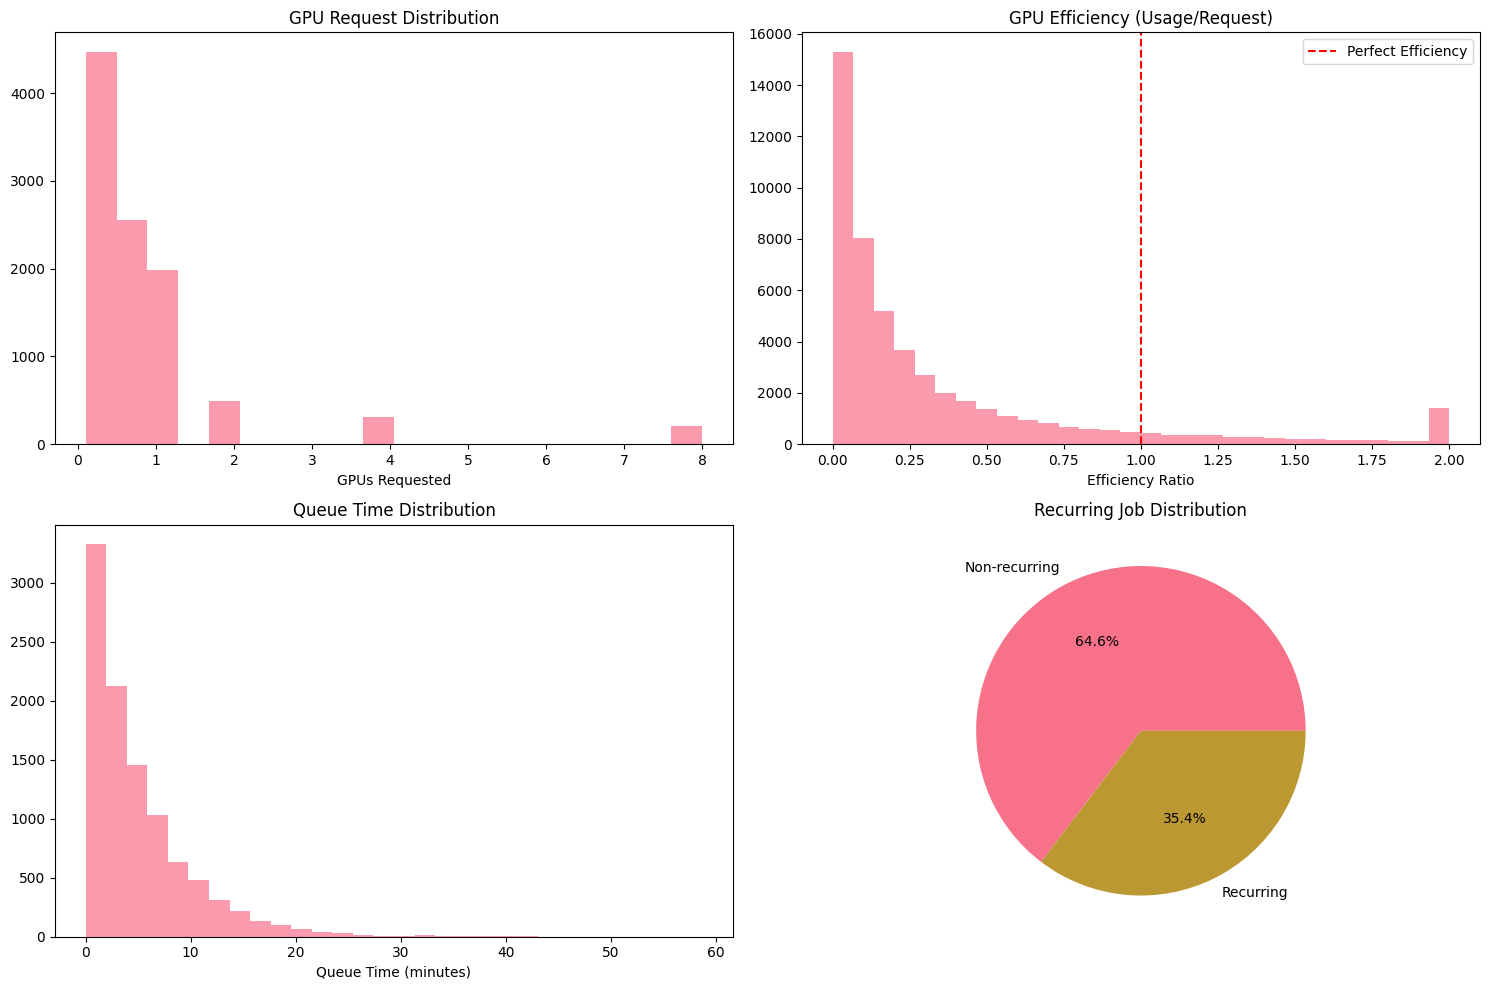


Resource Hoarding Analysis:
Median GPU efficiency: 0.153
Jobs with <50% GPU efficiency: 78.6%
Average queue time: 5.0 minutes
Recurring jobs: 64.6%


In [19]:
if 'jobs_df' in locals():
    # Resource hoarding analysis
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # GPU request vs usage patterns
    merged_df = pd.merge(jobs_df, instances_df, on='job_id')
    
    # Resource hoarding indicator
    merged_df['gpu_efficiency'] = merged_df['gpu_usage_avg'] / merged_df['gpu_request']
    
    # Plot 1: GPU request distribution
    axes[0,0].hist(jobs_df['gpu_request'], bins=20, alpha=0.7)
    axes[0,0].set_title('GPU Request Distribution')
    axes[0,0].set_xlabel('GPUs Requested')
    
    # Plot 2: GPU efficiency (usage/request)
    axes[0,1].hist(merged_df['gpu_efficiency'].clip(0, 2), bins=30, alpha=0.7)
    axes[0,1].set_title('GPU Efficiency (Usage/Request)')
    axes[0,1].set_xlabel('Efficiency Ratio')
    axes[0,1].axvline(x=1.0, color='red', linestyle='--', label='Perfect Efficiency')
    axes[0,1].legend()
    
    # Plot 3: Queue time distribution
    axes[1,0].hist(jobs_df['queue_time_seconds'] / 60, bins=30, alpha=0.7)
    axes[1,0].set_title('Queue Time Distribution')
    axes[1,0].set_xlabel('Queue Time (minutes)')
    
    # Plot 4: Recurring vs non-recurring jobs
    recurring_counts = jobs_df['is_recurring'].value_counts()
    axes[1,1].pie(recurring_counts.values, labels=['Non-recurring', 'Recurring'], 
                 autopct='%1.1f%%')
    axes[1,1].set_title('Recurring Job Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print('\nResource Hoarding Analysis:')
    print(f'Median GPU efficiency: {merged_df["gpu_efficiency"].median():.3f}')
    print(f'Jobs with <50% GPU efficiency: {(merged_df["gpu_efficiency"] < 0.5).mean():.1%}')
    print(f'Average queue time: {jobs_df["queue_time_seconds"].mean()/60:.1f} minutes')
    print(f'Recurring jobs: {jobs_df["is_recurring"].mean():.1%}')

In [20]:
# Basic data overview
print(f"\n--- BASIC DATA OVERVIEW ---")
print(f"Time range: {jobs_df['submission_time'].min()} to {jobs_df['submission_time'].max()}")
print(f"Unique users: {jobs_df['user_id'].nunique()}")
print(f"Unique machines: {instances_df['machine_id'].nunique()}")


--- BASIC DATA OVERVIEW ---
Time range: 2024-01-01 00:00:00 to 2024-02-04 17:15:00
Unique users: 100
Unique machines: 500


In [21]:
# Look at the first few rows to understand structure
print(f"\nSample Job Data:")
print(jobs_df.head(3)[['job_id', 'user_id', 'gpu_request', 'job_type', 'framework', 'is_recurring']])

print(f"\nSample Instance Data:")
print(instances_df.head(3)[['instance_id', 'job_id', 'machine_id', 'gpu_usage_avg', 'cpu_usage_avg']])


Sample Job Data:
       job_id   user_id  gpu_request  job_type   framework  is_recurring
0  job_000000  user_051          4.0  training     pytorch         False
1  job_000001  user_092          0.1  training  tensorflow          True
2  job_000002  user_014          1.0  training  tensorflow          True

Sample Instance Data:
     instance_id      job_id    machine_id  gpu_usage_avg  cpu_usage_avg
0  inst_00000000  job_005852  machine_0357       0.125522       0.248372
1  inst_00000001  job_000748  machine_0405       0.001365       0.248510
2  inst_00000002  job_009229  machine_0105       0.195554       0.452063



--- WHAT KINDS OF JOBS ARE RUNNING? ---
Job types:
  inference: 5,042 (50.4%)
  training: 3,972 (39.7%)
  preprocessing: 986 (9.9%)

Frameworks:
  tensorflow: 4,489 (44.9%)
  pytorch: 3,539 (35.4%)
  other: 1,972 (19.7%)

GPU requests:
  Range: 0.1 to 8.0
  Average: 0.78
  Most common: 0.5


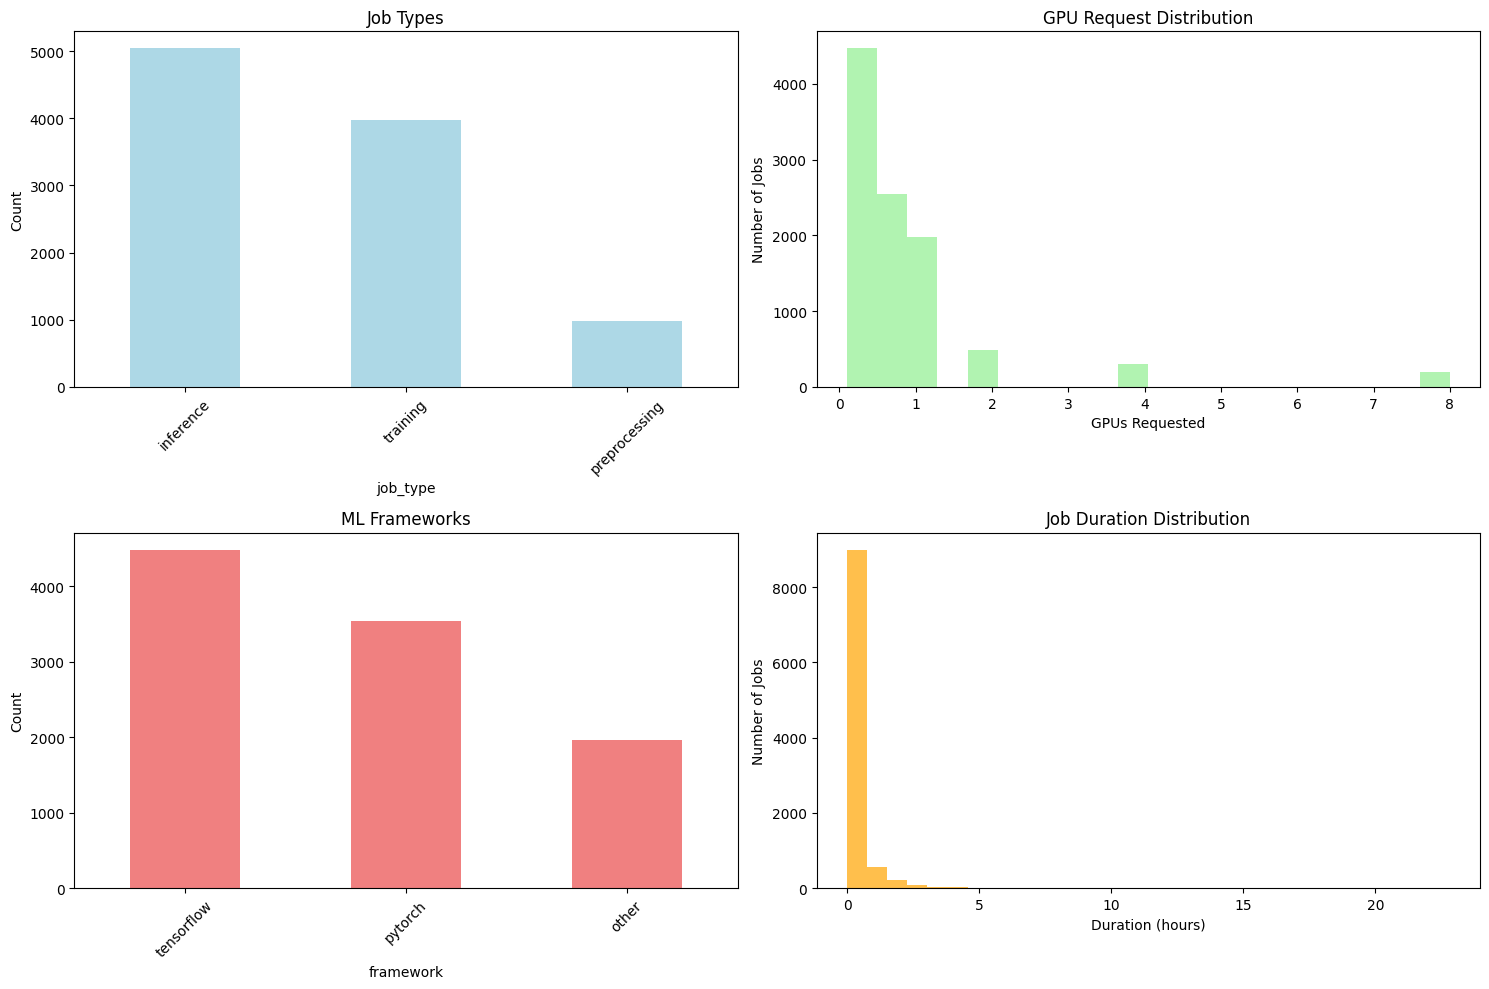

In [22]:
# === 1. WHAT KINDS OF JOBS ARE PEOPLE RUNNING? ===
print(f"\n--- WHAT KINDS OF JOBS ARE RUNNING? ---")

# Job types
job_type_counts = jobs_df['job_type'].value_counts()
print(f"Job types:")
for job_type, count in job_type_counts.items():
    print(f"  {job_type}: {count:,} ({count/len(jobs_df):.1%})")

# Frameworks
framework_counts = jobs_df['framework'].value_counts()
print(f"\nFrameworks:")
for framework, count in framework_counts.items():
    print(f"  {framework}: {count:,} ({count/len(jobs_df):.1%})")

# GPU requests
print(f"\nGPU requests:")
print(f"  Range: {jobs_df['gpu_request'].min():.1f} to {jobs_df['gpu_request'].max():.1f}")
print(f"  Average: {jobs_df['gpu_request'].mean():.2f}")
print(f"  Most common: {jobs_df['gpu_request'].mode().iloc[0]:.1f}")

# Quick visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Job types
job_type_counts.plot(kind='bar', ax=axes[0,0], color='lightblue')
axes[0,0].set_title('Job Types')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# GPU requests
axes[0,1].hist(jobs_df['gpu_request'], bins=20, alpha=0.7, color='lightgreen')
axes[0,1].set_title('GPU Request Distribution')
axes[0,1].set_xlabel('GPUs Requested')
axes[0,1].set_ylabel('Number of Jobs')

# Frameworks
framework_counts.plot(kind='bar', ax=axes[1,0], color='lightcoral')
axes[1,0].set_title('ML Frameworks')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)

# Duration
axes[1,1].hist(jobs_df['duration_seconds']/3600, bins=30, alpha=0.7, color='orange')
axes[1,1].set_title('Job Duration Distribution')
axes[1,1].set_xlabel('Duration (hours)')
axes[1,1].set_ylabel('Number of Jobs')

plt.tight_layout()
plt.show()


--- HOW ARE PEOPLE USING RESOURCES? ---
Resource usage patterns:
  Average GPU efficiency: 0.363
  Median GPU efficiency: 0.153
  Jobs using <10% of requested GPU: 19,707 (39.4%)

CPU and Memory:
  Average CPU usage: 0.285
  Average memory usage: 0.400


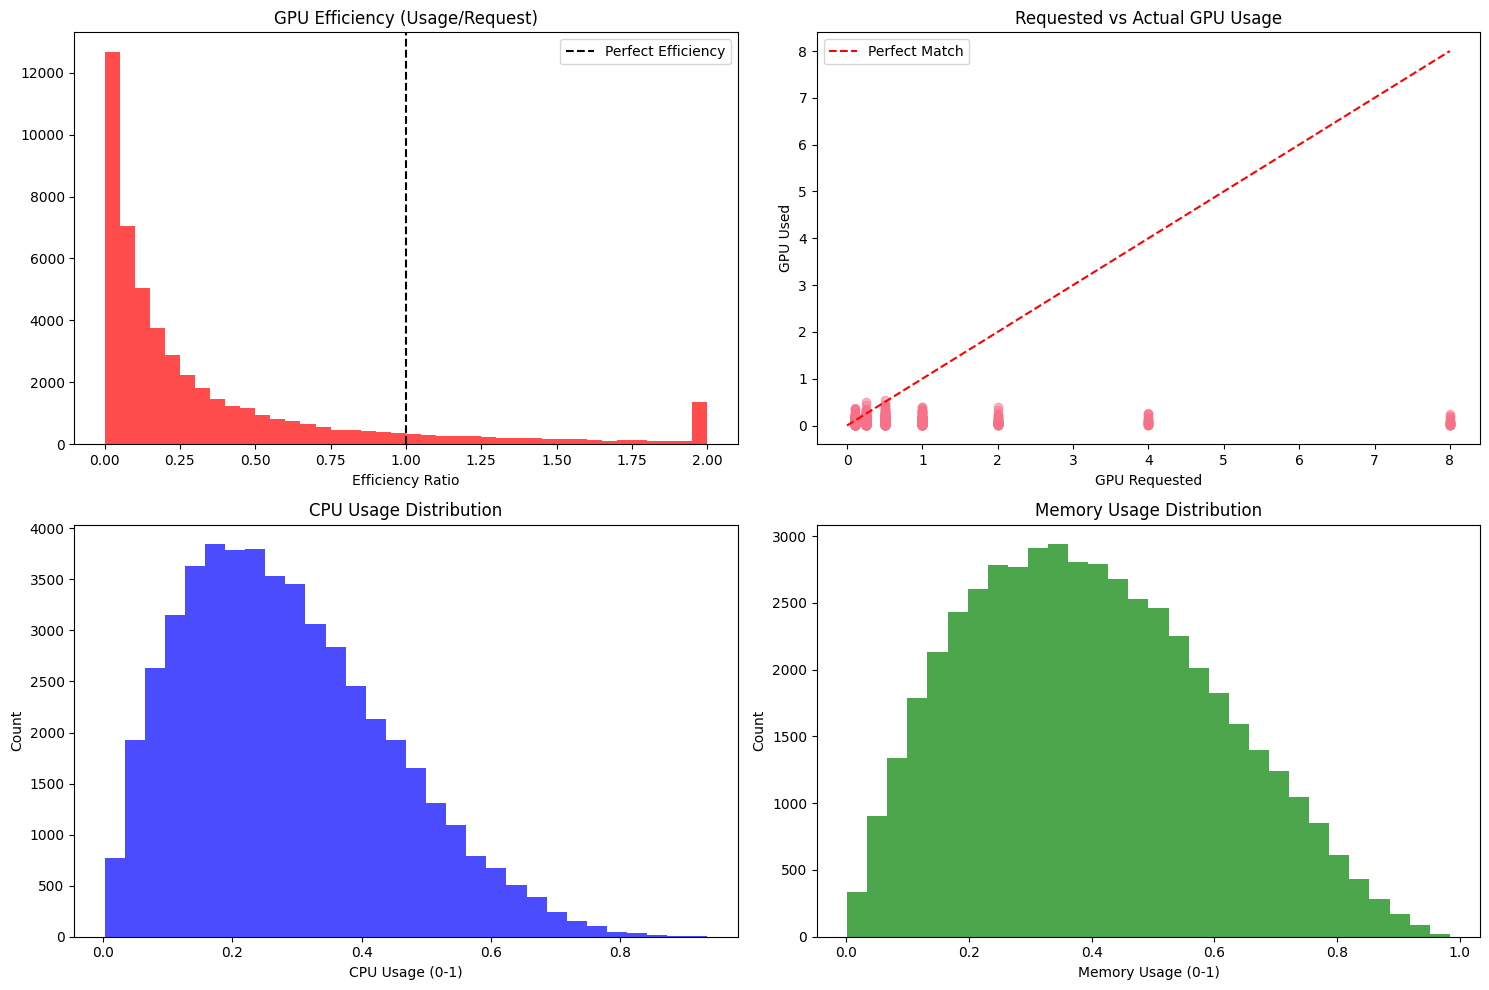

In [23]:
# === 2. HOW ARE PEOPLE USING RESOURCES? ===
print(f"\n--- HOW ARE PEOPLE USING RESOURCES? ---")

# Merge jobs and instances to see resource usage
merged_df = pd.merge(jobs_df, instances_df, on='job_id')

# Calculate efficiency (actual usage vs requested)
merged_df['gpu_efficiency'] = merged_df['gpu_usage_avg'] / merged_df['gpu_request']

print(f"Resource usage patterns:")
print(f"  Average GPU efficiency: {merged_df['gpu_efficiency'].mean():.3f}")
print(f"  Median GPU efficiency: {merged_df['gpu_efficiency'].median():.3f}")
print(f"  Jobs using <10% of requested GPU: {(merged_df['gpu_efficiency'] < 0.1).sum():,} ({(merged_df['gpu_efficiency'] < 0.1).mean():.1%})")

# CPU and memory patterns
print(f"\nCPU and Memory:")
print(f"  Average CPU usage: {merged_df['cpu_usage_avg'].mean():.3f}")
print(f"  Average memory usage: {merged_df['memory_usage_avg'].mean():.3f}")

# Resource usage visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# GPU efficiency
axes[0,0].hist(merged_df['gpu_efficiency'].clip(0, 2), bins=40, alpha=0.7, color='red')
axes[0,0].set_title('GPU Efficiency (Usage/Request)')
axes[0,0].set_xlabel('Efficiency Ratio')
axes[0,0].axvline(x=1.0, color='black', linestyle='--', label='Perfect Efficiency')
axes[0,0].legend()

# GPU request vs usage scatter
sample_data = merged_df.sample(1000)
axes[0,1].scatter(sample_data['gpu_request'], sample_data['gpu_usage_avg'], alpha=0.5)
axes[0,1].plot([0, sample_data['gpu_request'].max()], [0, sample_data['gpu_request'].max()], 'r--', label='Perfect Match')
axes[0,1].set_xlabel('GPU Requested')
axes[0,1].set_ylabel('GPU Used')
axes[0,1].set_title('Requested vs Actual GPU Usage')
axes[0,1].legend()

# CPU usage distribution
axes[1,0].hist(merged_df['cpu_usage_avg'], bins=30, alpha=0.7, color='blue')
axes[1,0].set_title('CPU Usage Distribution')
axes[1,0].set_xlabel('CPU Usage (0-1)')
axes[1,0].set_ylabel('Count')

# Memory usage distribution
axes[1,1].hist(merged_df['memory_usage_avg'], bins=30, alpha=0.7, color='green')
axes[1,1].set_title('Memory Usage Distribution')
axes[1,1].set_xlabel('Memory Usage (0-1)')
axes[1,1].set_ylabel('Count')

plt.tight_layout()
plt.show()


--- WHO ARE THE USERS? ---
User activity:
  Most active user: 126 jobs
  Least active user: 72 jobs
  Average jobs per user: 100.0
  Top 10 users account for: 11.7% of all jobs

User efficiency patterns:
  Most efficient user: 0.521
  Least efficient user: 0.281


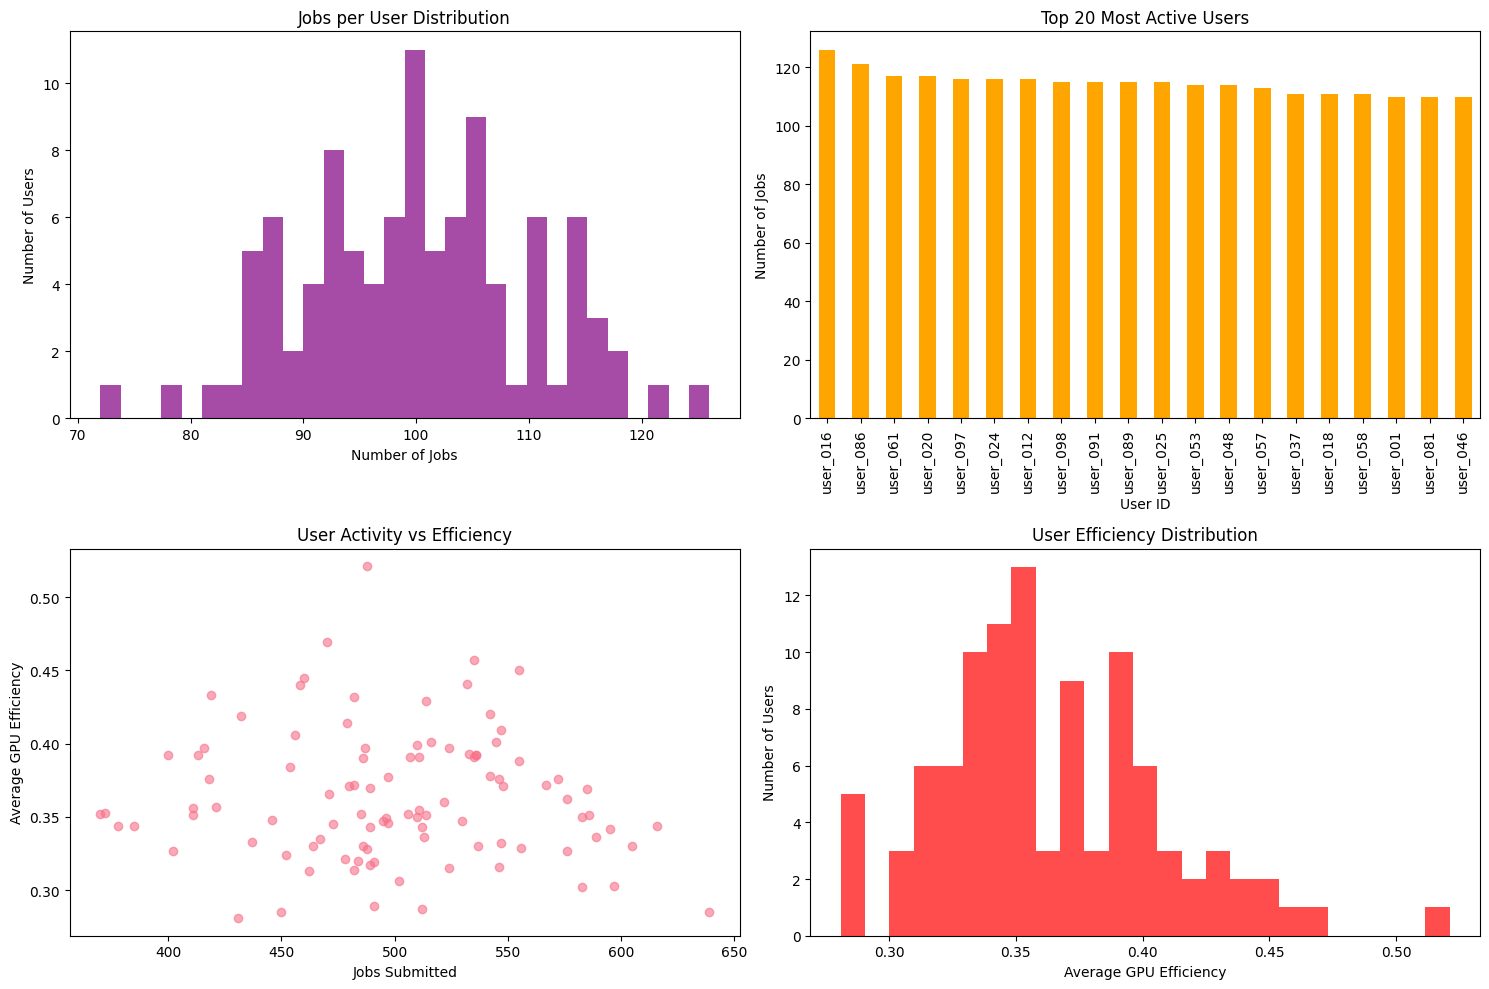

In [24]:
# === 3. WHO ARE THE USERS? ===
print(f"\n--- WHO ARE THE USERS? ---")

# User activity
user_job_counts = jobs_df['user_id'].value_counts()
print(f"User activity:")
print(f"  Most active user: {user_job_counts.iloc[0]} jobs")
print(f"  Least active user: {user_job_counts.iloc[-1]} jobs")
print(f"  Average jobs per user: {user_job_counts.mean():.1f}")

# Heavy users vs light users
top_10_users = user_job_counts.head(10).sum()
print(f"  Top 10 users account for: {top_10_users/len(jobs_df):.1%} of all jobs")

# User behavior patterns
user_patterns = merged_df.groupby('user_id').agg({
    'gpu_efficiency': 'mean',
    'job_id': 'count',
    'gpu_request': 'sum'
}).round(3)

user_patterns.columns = ['avg_efficiency', 'job_count', 'total_gpu_request']

print(f"\nUser efficiency patterns:")
print(f"  Most efficient user: {user_patterns['avg_efficiency'].max():.3f}")
print(f"  Least efficient user: {user_patterns['avg_efficiency'].min():.3f}")

# User visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# User job distribution
axes[0,0].hist(user_job_counts.values, bins=30, alpha=0.7, color='purple')
axes[0,0].set_title('Jobs per User Distribution')
axes[0,0].set_xlabel('Number of Jobs')
axes[0,0].set_ylabel('Number of Users')

# Top users
user_job_counts.head(20).plot(kind='bar', ax=axes[0,1], color='orange')
axes[0,1].set_title('Top 20 Most Active Users')
axes[0,1].set_xlabel('User ID')
axes[0,1].set_ylabel('Number of Jobs')
axes[0,1].tick_params(axis='x', rotation=90)

# User efficiency scatter
axes[1,0].scatter(user_patterns['job_count'], user_patterns['avg_efficiency'], alpha=0.6)
axes[1,0].set_xlabel('Jobs Submitted')
axes[1,0].set_ylabel('Average GPU Efficiency')
axes[1,0].set_title('User Activity vs Efficiency')

# Efficiency distribution
axes[1,1].hist(user_patterns['avg_efficiency'], bins=25, alpha=0.7, color='red')
axes[1,1].set_title('User Efficiency Distribution')
axes[1,1].set_xlabel('Average GPU Efficiency')
axes[1,1].set_ylabel('Number of Users')

plt.tight_layout()
plt.show()


--- WHEN DO JOBS HAPPEN? ---
Job patterns:
  Recurring jobs: 6,464 (64.6%)
  One-time jobs: 3,536 (35.4%)

Timing patterns:
  Busiest hour: 0:00 (420 jobs)
  Quietest hour: 18:00 (408 jobs)

Queue behavior:
  Average queue time: 5.0 minutes
  Max queue time: 58.7 minutes
  Jobs that waited >10 min: 1,353 (13.5%)


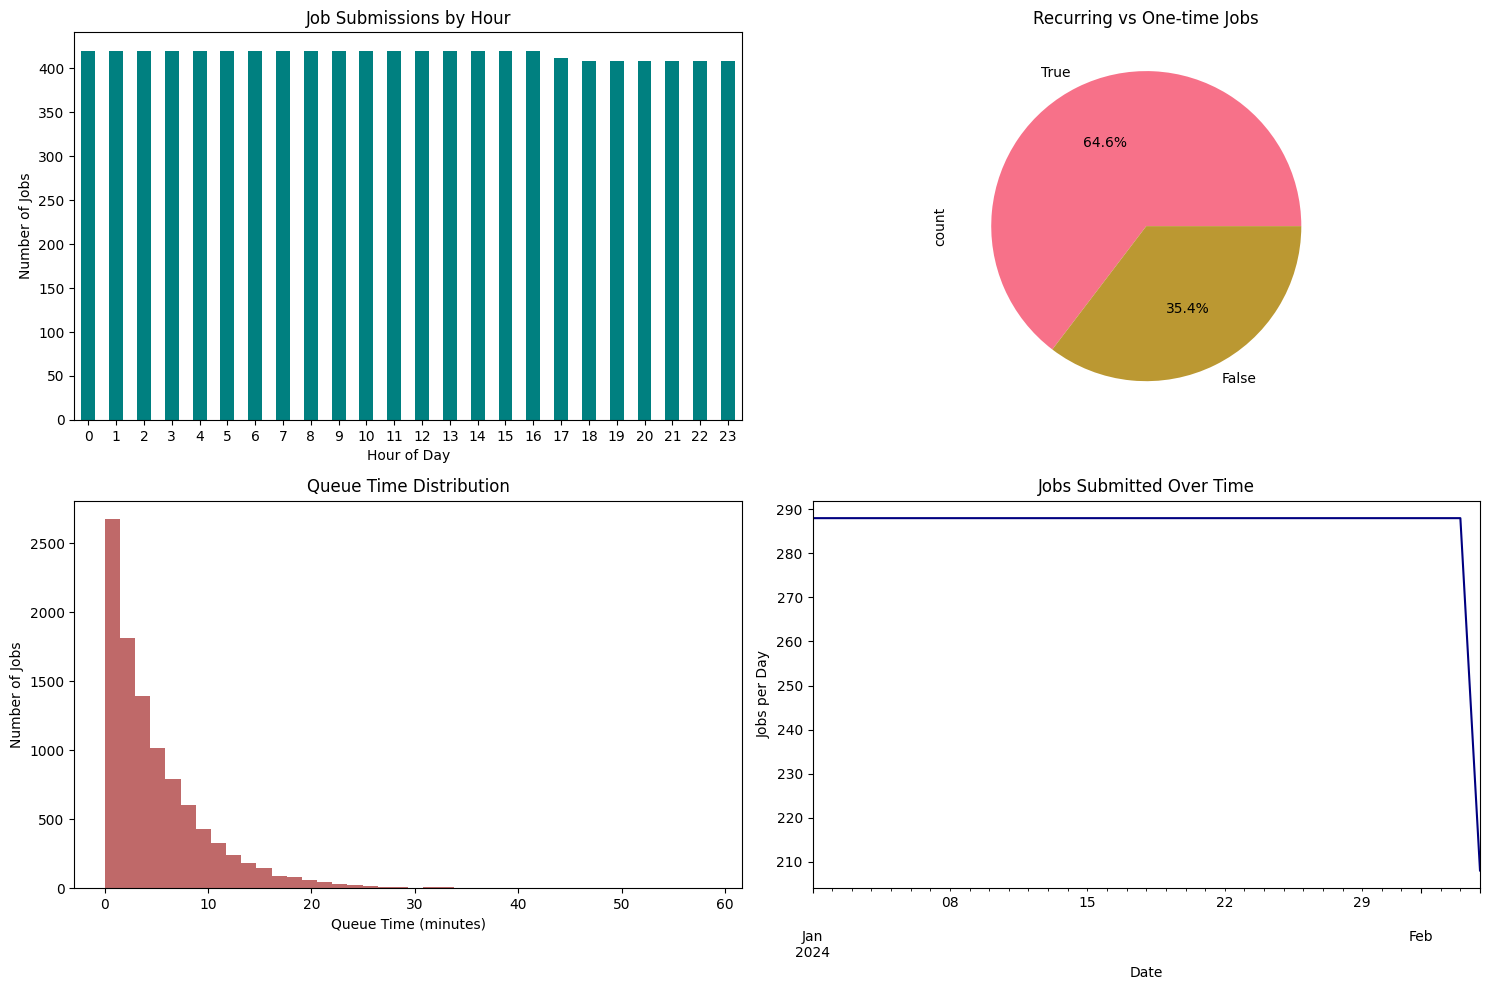

In [25]:
# === 4. WHEN DO JOBS HAPPEN? ===
print(f"\n--- WHEN DO JOBS HAPPEN? ---")

# Add time features
jobs_df['hour'] = jobs_df['submission_time'].dt.hour
jobs_df['day_of_week'] = jobs_df['submission_time'].dt.dayofweek

# Recurring vs one-time
recurring_stats = jobs_df['is_recurring'].value_counts()
print(f"Job patterns:")
print(f"  Recurring jobs: {recurring_stats[True]:,} ({recurring_stats[True]/len(jobs_df):.1%})")
print(f"  One-time jobs: {recurring_stats[False]:,} ({recurring_stats[False]/len(jobs_df):.1%})")

# Time patterns
hourly_pattern = jobs_df.groupby('hour').size()
print(f"\nTiming patterns:")
print(f"  Busiest hour: {hourly_pattern.idxmax()}:00 ({hourly_pattern.max()} jobs)")
print(f"  Quietest hour: {hourly_pattern.idxmin()}:00 ({hourly_pattern.min()} jobs)")

# Queue times
print(f"\nQueue behavior:")
print(f"  Average queue time: {jobs_df['queue_time_seconds'].mean()/60:.1f} minutes")
print(f"  Max queue time: {jobs_df['queue_time_seconds'].max()/60:.1f} minutes")
print(f"  Jobs that waited >10 min: {(jobs_df['queue_time_seconds'] > 600).sum():,} ({(jobs_df['queue_time_seconds'] > 600).mean():.1%})")

# Time visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Hourly submissions
hourly_pattern.plot(kind='bar', ax=axes[0,0], color='teal')
axes[0,0].set_title('Job Submissions by Hour')
axes[0,0].set_xlabel('Hour of Day')
axes[0,0].set_ylabel('Number of Jobs')
axes[0,0].tick_params(axis='x', rotation=0)

# Recurring vs non-recurring
recurring_stats.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('Recurring vs One-time Jobs')

# Queue times
axes[1,0].hist(jobs_df['queue_time_seconds']/60, bins=40, alpha=0.7, color='brown')
axes[1,0].set_title('Queue Time Distribution')
axes[1,0].set_xlabel('Queue Time (minutes)')
axes[1,0].set_ylabel('Number of Jobs')

# Jobs over time (daily pattern)
jobs_df.set_index('submission_time').resample('D').size().plot(ax=axes[1,1], color='navy')
axes[1,1].set_title('Jobs Submitted Over Time')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Jobs per Day')

plt.tight_layout()
plt.show()

In [26]:
# === 5. WHAT ABOUT THE MACHINES? ===
print(f"\n--- WHAT ABOUT THE MACHINES? ---")

print(f"Machine inventory:")
print(f"  Total machines: {len(machines_df)}")
print(f"  GPU types: {machines_df['gpu_type'].value_counts().to_dict()}")
print(f"  Total GPUs available: {machines_df['gpu_count'].sum()}")
print(f"  Average GPUs per machine: {machines_df['gpu_count'].mean():.1f}")

# Machine utilization
machine_usage = instances_df.groupby('machine_id').agg({
    'instance_id': 'count',
    'gpu_usage_avg': 'mean',
    'cpu_usage_avg': 'mean'
}).round(3)

machine_usage.columns = ['instance_count', 'avg_gpu_usage', 'avg_cpu_usage']

print(f"\nMachine utilization:")
print(f"  Busiest machine: {machine_usage['instance_count'].max()} instances")
print(f"  Average instances per machine: {machine_usage['instance_count'].mean():.1f}")
print(f"  Machines with no instances: {(machine_usage['instance_count'] == 0).sum()}")

# === SUMMARY ===
print(f"\n" + "="*50)
print(f"WHAT THE DATA TELLS US - KEY FINDINGS")
print(f"="*50)

print(f"\n1. RESOURCE INEFFICIENCY:")
print(f"   - Average GPU efficiency is only {merged_df['gpu_efficiency'].mean():.1%}")
print(f"   - {(merged_df['gpu_efficiency'] < 0.1).mean():.1%} of jobs use <10% of requested GPU")
print(f"   - Major opportunity for optimization")

print(f"\n2. USER BEHAVIOR:")
print(f"   - {jobs_df['user_id'].nunique()} users, but top 10 submit {top_10_users/len(jobs_df):.1%} of jobs")
print(f"   - Heavy concentration suggests predictable patterns")

print(f"\n3. JOB PATTERNS:")
print(f"   - {recurring_stats[True]/len(jobs_df):.1%} of jobs are recurring")
print(f"   - {job_type_counts['training']/len(jobs_df):.1%} training, {job_type_counts['inference']/len(jobs_df):.1%} inference")
print(f"   - Strong temporal patterns exist")

print(f"\n4. SCHEDULING ISSUES:")
print(f"   - {(jobs_df['queue_time_seconds'] > 600).mean():.1%} of jobs wait >10 minutes")
print(f"   - Queue spiraling indicates scheduling bottlenecks")

print(f"\n5. INFRASTRUCTURE:")
print(f"   - {len(machines_df)} machines with {machines_df['gpu_count'].sum()} total GPUs")
print(f"   - Heterogeneous GPU types: {list(machines_df['gpu_type'].unique())}")

print(f"\nThis data reveals significant inefficiencies that autonomous")
print(f"optimization could address through behavioral pattern recognition.")


--- WHAT ABOUT THE MACHINES? ---
Machine inventory:
  Total machines: 500
  GPU types: {'T4': 151, 'P100': 149, 'V100': 149, 'A100': 51}
  Total GPUs available: 1910
  Average GPUs per machine: 3.8

Machine utilization:
  Busiest machine: 130 instances
  Average instances per machine: 100.0
  Machines with no instances: 0

WHAT THE DATA TELLS US - KEY FINDINGS

1. RESOURCE INEFFICIENCY:
   - Average GPU efficiency is only 36.3%
   - 39.4% of jobs use <10% of requested GPU
   - Major opportunity for optimization

2. USER BEHAVIOR:
   - 100 users, but top 10 submit 11.7% of jobs
   - Heavy concentration suggests predictable patterns

3. JOB PATTERNS:
   - 64.6% of jobs are recurring
   - 39.7% training, 50.4% inference
   - Strong temporal patterns exist

4. SCHEDULING ISSUES:
   - 13.5% of jobs wait >10 minutes
   - Queue spiraling indicates scheduling bottlenecks

5. INFRASTRUCTURE:
   - 500 machines with 1910 total GPUs
   - Heterogeneous GPU types: ['P100', 'V100', 'T4', 'A100']

Th